In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:
data = pd.read_csv('./pet_df.csv')
data = data.drop_duplicates('mission-id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 12711
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             739 non-null    object 
 1   species          739 non-null    int64  
 2   mission-id       739 non-null    object 
 3   provider-code    739 non-null    int64  
 4   breed            739 non-null    object 
 5   age              739 non-null    float64
 6   class            739 non-null    object 
 7   sex              739 non-null    object 
 8   weight           739 non-null    float64
 9   shoulder-height  739 non-null    float64
 10  neck-size        739 non-null    float64
 11  back-length      739 non-null    float64
 12  chest-size       739 non-null    float64
 13  BCS              739 non-null    int64  
 14  body-part        739 non-null    int64  
 15  exercise         739 non-null    int64  
 16  food-count       739 non-null    int64  
 17  environment   

---

# 간단히 변수 별 확인

In [3]:
data.species.value_counts()

10    728
20     11
Name: species, dtype: int64

### 강아지 나이 전처리

In [4]:
print(data.age.describe())
print('\nMinimum Age is:', data.age.min())

count    739.000000
mean       6.409242
std        3.935863
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       21.000000
Name: age, dtype: float64

Minimum Age is: 0.0


In [5]:
print(data.loc[data['age'] == 0][['mission-id', 'weight', 'breed', 'age', 'image-id']])
print('\n The number of Pet whose Age 0 is:',
      data.loc[data['age'] == 0]['mission-id'].count())

      mission-id  weight breed  age                               image-id
52     10_000087    6.00   MIX  0.0  A_10_MIX_IM_20221017_10_000087_20.jpg
209    10_000216    2.91   MAL  0.0  A_10_MAL_IM_20221020_10_000216_01.jpg
286    10_000225   11.50   ETC  0.0  A_10_ETC_IM_20221020_10_000225_17.jpg
300    10_000226   11.00   ETC  0.0  A_10_ETC_IF_20221020_10_000226_04.jpg
350    10_000229   18.00   ETC  0.0  A_10_ETC_IF_20221020_10_000229_05.jpg
685    10_000278   22.00   POO  0.0  A_10_POO_CM_20221024_10_000278_19.jpg
1102   10_000363   46.00   ETC  0.0  A_10_ETC_CM_20221028_10_000363_19.jpg
1429   10_000407   13.00   ETC  0.0  A_10_ETC_IM_20221101_10_000407_08.jpg
2376   10_000695   15.00   MIX  0.0  A_10_MIX_IM_20221106_10_000695_16.jpg
2446   10_000706    1.38   POO  0.0  A_10_POO_IF_20221106_10_000706_01.jpg
2478   10_000720    2.40   MAL  0.0  A_10_MAL_IM_20221106_10_000720_19.jpg
2647   10_000780    2.60   POM  0.0  A_10_POM_IF_20221107_10_000780_19.jpg
5076   10_000995    3.10 

- 맨 아래 행은 고양이라 제외
- 0살인 강아지 18마리는 체중 등을 봤을 때 0살 아닌데 잘못 입력되거나
- 알 수 없는데 nan이 아니라 0으로 기록한 듯

In [220]:
# 10_000087는 6년 9개월
# 이 강아지만 사진에서 나이 식별이 가능했음
data.loc[data['mission-id'] == '10_000087', 'age'] = 6

- 나머지 17마리 강아지에 대해서는 어떡하지
- 1. 결측으로 생각하고 삭제
- 2. 평균 나이로 채우기
- 3. 품종 별 평균 나이로 채우기
- 4. 회귀식으로 보간

In [221]:
data.loc[data['age'] == 0, 'age'] = np.NaN
data.age.isnull().sum()

18

In [5]:
data.dropna(axis = 0, inplace = True)
data.shape

(721, 27)

### 일단 나이가 0인 강아지 17마리, 고양이 1마리 삭제함

---

In [9]:
data['class'].value_counts() # 반려견 대중소, 반려묘-단/장모

SS    585
MS     89
LS     29
UK      8
SH      7
LH      3
Name: class, dtype: int64

In [10]:
data.sex.value_counts()

CM    263
SF    232
IF    143
IM     83
Name: sex, dtype: int64

---
### 체중 변수 전처리

In [11]:
print(data.weight.describe())
print('\n Minimum weight is:', data.weight.min())

count    721.000000
mean       6.113523
std        5.864533
min        0.000000
25%        3.300000
50%        4.360000
75%        6.490000
max       46.800000
Name: weight, dtype: float64

 Minimum weight is: 0.0


- 체중이 0인 강아지 전처리 필요
- 1. 삭제
- 2. 보간

In [222]:
data.loc[data['weight'] == 0, 'weight'] = np.NaN
data.weight.isnull().sum()

1

In [223]:
data.dropna(axis = 0, inplace = True)
data.shape

(720, 27)

### 일단 체중이 0인 강아지도 삭제
---

In [17]:
data['food-count'].value_counts()

2    462
4    156
1     83
3     19
Name: food-count, dtype: int64

In [18]:
data['food-kind'].value_counts()

1    568
2    151
3      1
Name: food-kind, dtype: int64

---
### 1회 식사량 전처리

In [19]:
data['food-amount'].describe()

count    720.000000
mean       1.205472
std        1.219179
min        0.100000
25%        0.500000
50%        1.000000
75%        1.400000
max       19.980000
Name: food-amount, dtype: float64

In [20]:
data['food-amount'].sort_values(ascending = False)

4621     19.98
9909     15.00
1339      8.00
9165      6.50
2414      5.00
         ...  
1535      0.24
476       0.20
425       0.20
5824      0.10
10348     0.10
Name: food-amount, Length: 720, dtype: float64

In [21]:
data.columns

Index(['type', 'species', 'mission-id', 'provider-code', 'breed', 'age',
       'class', 'sex', 'weight', 'shoulder-height', 'neck-size', 'back-length',
       'chest-size', 'BCS', 'body-part', 'exercise', 'food-count',
       'environment', 'defecation', 'food-amount', 'snack-amount', 'food-kind',
       'image-id', 'label', 'points', 'shape', 'part'],
      dtype='object')

- 1회 종이컵 기준 20컵, 15컵 먹는 것이 수상함

In [22]:
data.loc[(data['food-amount'] == 19.98) | (data['food-amount'] == 15) | (data['food-amount'] == 8) | (data['food-amount'] == 5)][['breed', 'age', 'weight', 'food-count', 'food-amount']]

,breed,age,weight,food-count,food-amount
1339,ETC,3.0,22.50,1,8.00
2359,MIX,6.0,20.00,4,5.00
2414,MIX,5.0,20.00,4,5.00
4621,CHI,8.0,1.80,4,19.98
9909,POO,3.0,2.38,3,15.00


- 22.5kg 강아지가 먹는 사료 8컵은 합리적
- 20kg 강아지가 먹는 사료 5컵 하루 4회도 합리적
- 1.8kg 강아지, 2.4kg 강아지가 15컵 이상 섭취하는 것은 착오가 있는 것으로 보임

In [224]:
# 이상치 확인
food_3q = data['food-amount'].quantile(0.75)
food_1q = data['food-amount'].quantile(0.25)

food_IQR = food_3q - food_1q
print(food_1q, food_3q, food_IQR)

0.5 1.4 0.8999999999999999


In [24]:
data.loc[(data['food-amount'] > food_3q + 3 * food_IQR) |
         (data['food-amount'] < food_1q - 3 * food_IQR)][['food-amount', 'food-count']]

,food-amount,food-count
1339,8.00,1
2359,5.00,4
2414,5.00,4
4621,19.98,4
9165,6.50,2
9909,15.00,3


In [225]:
data.loc[data['food-amount'] >= 15, 'food-amount'] = np.NaN
data['food-amount'].isnull().sum()

2

In [226]:
data.dropna(axis = 0, inplace = True)
data.shape

(718, 27)

- 15컵 이상인 두 친구만 삭제
---

In [27]:
data['defecation'].value_counts()

1    712
2      6
Name: defecation, dtype: int64

In [28]:
data.environment.value_counts()

1    713
2      5
Name: environment, dtype: int64

---
### BCS 전처리
- 이전에 데이터 프레임 생성하면서 같은 강아지인데 BCS가 다른 녀석은 더 많은 BCS로 처리

In [12]:
data.BCS.value_counts()

5    291
4    166
6    142
3     63
7     35
2     11
9      6
8      4
Name: BCS, dtype: int64

In [11]:
data['exercise'].value_counts()

2    272
1    266
3    180
Name: exercise, dtype: int64

In [13]:
data['snack-amount'].describe()

count    718.000000
mean      10.212047
std        7.534904
min        0.000000
25%        1.000000
50%       10.000000
75%       19.990000
max       20.000000
Name: snack-amount, dtype: float64

- 간식량은 0이어도 인정

In [32]:
data.type.value_counts()

A    711
B      7
Name: type, dtype: int64

# Feature Engineering 시작

In [254]:
# 데이터 설명에 의하면 snack-amount는 food-amount에 대비 퍼센트
# 하루 식사량 계산하자면
# food-count * food-amount + food-amount * snack-amount * 0.01 = day_food_amount
data['day_food_amount'] = np.NaN
data['day_food_amount'] = round(data['food-amount'] * data['food-count'] + data['food-amount'] * data['snack-amount'] * 0.01, 3)

In [255]:
data['day_food_amount']

0        2.010
18       4.020
30       4.200
38       2.200
44       1.788
         ...  
12639    1.402
12645    4.100
12679    4.000
12691    3.150
12711    2.000
Name: day_food_amount, Length: 718, dtype: float64

In [35]:
data.columns

Index(['type', 'species', 'mission-id', 'provider-code', 'breed', 'age',
       'class', 'sex', 'weight', 'shoulder-height', 'neck-size', 'back-length',
       'chest-size', 'BCS', 'body-part', 'exercise', 'food-count',
       'environment', 'defecation', 'food-amount', 'snack-amount', 'food-kind',
       'image-id', 'label', 'points', 'shape', 'part', 'day_food_amount'],
      dtype='object')

In [229]:
df = data[['mission-id', 'breed', 'age', 'weight', 'shoulder-height',
           'neck-size', 'back-length', 'chest-size',
           'sex', 'exercise', 'BCS', 'day_food_amount']]
df.columns = ['mission_id', 'breed', 'age', 'weight', 'shoulder_height',
              'neck_size', 'back_length', 'chest_size',
              'sex', 'exercise', 'BCS', 'day_food_amount']
df

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount
0,10_000077,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.020
18,10_000078,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.020
30,10_000083,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.800
38,10_000084,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.400
44,10_000085,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.690
...,...,...,...,...,...,...,...,...,...,...,...,...
12639,20_000009,RUS,4.0,7.08,20.0,19.00,44.00,44.0,CM,1,9,1.406
12645,20_000016,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.400
12679,20_000019,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.000
12691,20_000023,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.200


In [37]:
df_mal = df.loc[df['breed'] == 'MAL']
df_mal

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount
140,10_000142,MAL,7.0,3.39,20.0,25.0,10.0,32.98,CM,1,5,2.00
222,10_000217,MAL,18.0,2.99,21.0,21.0,19.0,34.00,SF,1,5,1.00
458,10_000236,MAL,1.0,1.70,20.0,16.0,24.0,28.00,IF,2,5,0.76
476,10_000237,MAL,12.0,6.00,22.0,27.0,23.0,47.00,CM,1,7,1.60
556,10_000260,MAL,9.0,5.90,26.0,33.0,35.0,47.00,CM,1,6,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...
11916,10_100050,MAL,2.0,2.50,25.0,22.0,28.0,30.00,IF,2,5,1.01
12435,10_101464,MAL,9.0,3.10,22.0,22.0,23.0,33.00,SF,1,6,4.60
12453,10_101465,MAL,8.0,3.20,25.0,20.0,23.0,34.00,CM,1,6,4.60
12472,10_101466,MAL,9.8,3.69,27.0,28.0,35.0,39.00,CM,2,4,1.00


In [40]:
df_mal

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount
140,10_000142,MAL,7.0,3.39,20.0,25.0,10.0,32.98,CM,1,5,2.00
222,10_000217,MAL,18.0,2.99,21.0,21.0,19.0,34.00,SF,1,5,1.00
458,10_000236,MAL,1.0,1.70,20.0,16.0,24.0,28.00,IF,2,5,0.76
476,10_000237,MAL,12.0,6.00,22.0,27.0,23.0,47.00,CM,1,7,1.60
556,10_000260,MAL,9.0,5.90,26.0,33.0,35.0,47.00,CM,1,6,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...
11916,10_100050,MAL,2.0,2.50,25.0,22.0,28.0,30.00,IF,2,5,1.01
12435,10_101464,MAL,9.0,3.10,22.0,22.0,23.0,33.00,SF,1,6,4.60
12453,10_101465,MAL,8.0,3.20,25.0,20.0,23.0,34.00,CM,1,6,4.60
12472,10_101466,MAL,9.8,3.69,27.0,28.0,35.0,39.00,CM,2,4,1.00


In [41]:
corr_df = df_mal[['age', 'weight', 'shoulder_height',
                  'neck_size', 'back_length', 'chest_size',
                  'exercise', 'BCS', 'day_food_amount']].corr()
corr_df

,age,weight,shoulder_height,neck_size,back_length,chest_size,exercise,BCS,day_food_amount
age,1.000000,0.104307,-0.048466,0.120685,0.086789,0.161009,-0.218934,0.040807,0.085895
weight,0.104307,1.000000,0.521762,0.695851,0.546430,0.868889,0.152059,0.477590,0.193233
shoulder_height,-0.048466,0.521762,1.000000,0.374196,0.247374,0.381459,0.086004,0.211251,0.090320
neck_size,0.120685,0.695851,0.374196,1.000000,0.342605,0.694517,0.081503,0.504934,0.176879
back_length,0.086789,0.546430,0.247374,0.342605,1.000000,0.569792,0.160104,0.265940,-0.039938
chest_size,0.161009,0.868889,0.381459,0.694517,0.569792,1.000000,0.170015,0.464025,0.133753
exercise,-0.218934,0.152059,0.086004,0.081503,0.160104,0.170015,1.000000,0.157043,-0.176567
BCS,0.040807,0.477590,0.211251,0.504934,0.265940,0.464025,0.157043,1.000000,0.217649
day_food_amount,0.085895,0.193233,0.090320,0.176879,-0.039938,0.133753,-0.176567,0.217649,1.000000


<Figure size 2880x2880 with 0 Axes>

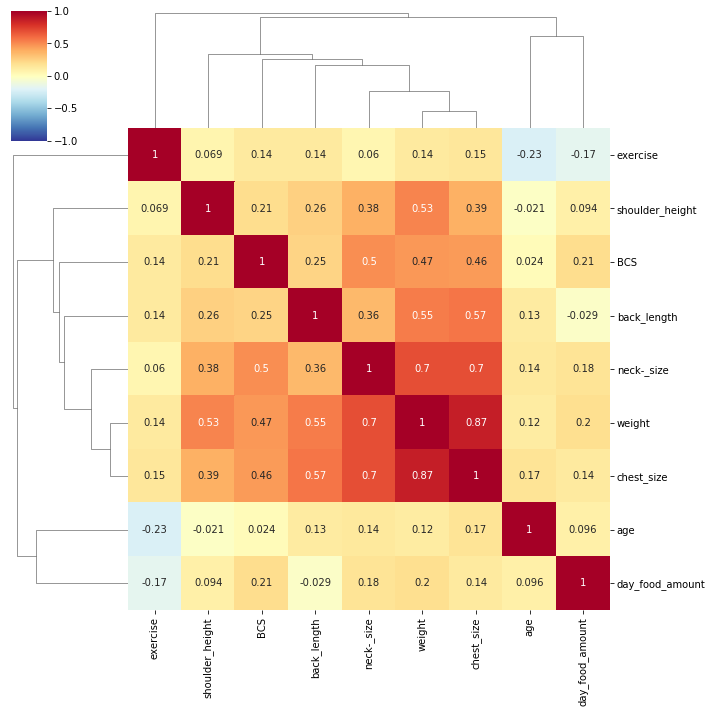

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

plt.figure(figsize = (40, 40))
sns.clustermap(corr_df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

In [11]:
df.BCS.value_counts()

5    298
4    174
6    144
3     65
7     37
2     11
9      6
8      4
Name: BCS, dtype: int64

In [230]:
df['over_weight'] = np.NaN
df['over_weight'] = df['weight'] - df['weight'] * 100 / (100 + (df['BCS'] - 5) * 10)
df['over_weight']

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        0.000000
18       0.000000
30       0.000000
38      -0.638889
44       0.000000
           ...   
12639    2.022857
12645    0.833333
12679    0.345455
12691    1.025000
12711    0.559091
Name: over_weight, Length: 718, dtype: float64

In [15]:
df.over_weight.describe()

count    739.000000
mean      -0.040108
std        1.009313
min       -9.000000
25%       -0.355000
50%        0.000000
75%        0.239091
max        7.666667
Name: over_weight, dtype: float64

<Figure size 2880x2880 with 0 Axes>

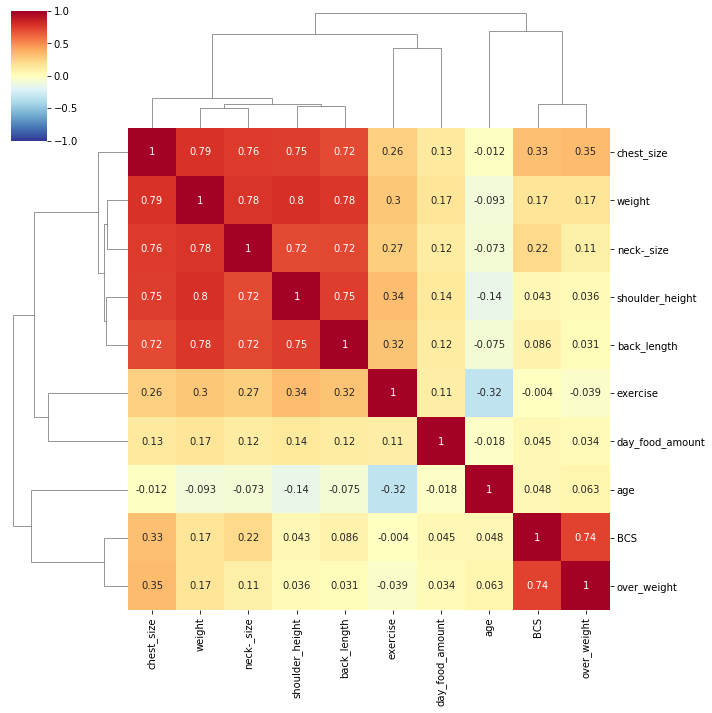

In [16]:
corr_df = df[['age', 'weight', 'shoulder_height',
              'neck-_size', 'back_length', 'chest_size',
              'exercise', 'BCS', 'day_food_amount', 'over_weight']].corr()
corr_df

plt.figure(figsize = (40, 40))
sns.clustermap(corr_df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

In [231]:
# 휴식시 에너지 요구량
df['RER'] = np.NaN
df['RER'] = 70 * df['weight'] ** .75

# 1일 에너지 요구량 
df['DER'] = np.NaN

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [74]:
df

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
0,10_000077,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.02,0.000000,422.807375,NaN
18,10_000078,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.02,0.000000,381.769707,NaN
30,10_000083,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.80,0.000000,179.122059,NaN
38,10_000084,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.40,-0.638889,259.925521,NaN
44,10_000085,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.69,0.000000,182.565570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,20_000016,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.40,0.833333,234.059107,NaN
12660,20_000018,KOR,0.0,3.63,25.0,36.00,17.00,32.0,IM,1,4,1.00,-0.403333,184.089072,NaN
12679,20_000019,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.00,0.345455,190.517879,NaN
12691,20_000023,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.20,1.025000,273.372218,NaN


In [19]:
### What we need
# d[1]: mission_id
# d[3]: age, d[4]: weight, d[9]: sex, d[10]: exercise, d[14]: RER, d[15]: DER

for d in df[0:1].itertuples():
    print(df.loc[df['mission_id'] == d[1], 'DER'])
df

0   NaN
Name: DER, dtype: float64


,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
0,10_000077,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.020,0.000000,422.807375,NaN
18,10_000078,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.020,0.000000,381.769707,NaN
30,10_000083,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.800,0.000000,179.122059,NaN
38,10_000084,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.400,-0.638889,259.925521,NaN
44,10_000085,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.690,0.000000,182.565570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12639,20_000009,RUS,4.0,7.08,20.0,19.00,44.00,44.0,CM,1,9,1.406,2.022857,303.824634,NaN
12645,20_000016,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.400,0.833333,234.059107,NaN
12679,20_000019,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.000,0.345455,190.517879,NaN
12691,20_000023,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.200,1.025000,273.372218,NaN


In [66]:
df

,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
0,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.02,0.000000,422.807375,NaN
18,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.02,0.000000,381.769707,NaN
30,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.80,0.000000,179.122059,NaN
38,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.40,-0.638889,259.925521,NaN
44,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.69,0.000000,182.565570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.40,0.833333,234.059107,NaN
12660,KOR,0.0,3.63,25.0,36.00,17.00,32.0,IM,1,4,1.00,-0.403333,184.089072,NaN
12679,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.00,0.345455,190.517879,NaN
12691,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.20,1.025000,273.372218,NaN


In [47]:
df.sex.unique()

array(['IM', 'SF', 'IF', 'CM'], dtype=object)

In [52]:
df

,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
0,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.02,0.000000,422.807375,NaN
18,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.02,0.000000,381.769707,NaN
30,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.80,0.000000,179.122059,NaN
38,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.40,-0.638889,259.925521,NaN
44,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.69,0.000000,182.565570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.40,0.833333,234.059107,NaN
12660,KOR,0.0,3.63,25.0,36.00,17.00,32.0,IM,1,4,1.00,-0.403333,184.089072,NaN
12679,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.00,0.345455,190.517879,NaN
12691,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.20,1.025000,273.372218,NaN


In [232]:
for d in df.itertuples():
    
    # 0 ~ 4개월 강아지는 DER = RER * 3
    if d[3] < 0.4:
        df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 3
        
    # 4 ~ 10개월 (성견) 강아지 DER = RER * 2
    elif 0.4 <= d[3] < 8:
        df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 2
    
    # 나머지의 경우 중성화, 운동강도로 결정
    else:
        # 중성화 성견 중에
        if d[9] == 'SF' or d[9] == 'CM':
            
            # 운동강도 일주일에 한시간 미만인 강아지: DER = 1.2 * RER
            if d[10] == 1:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 1.2
            
            # 운동강도 하루에 한시간 이상인 활동적인 강아지: DER = 2 * RER
            elif d[10] == 3:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 2
            
            # 운동강도 보통인 중성화한 강아지: DER = 1.6 * RER
            else:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 1.6
            
        
        # 중성화하지 않은 성견 중에
        else:
            # 운동강도 일주일에 한시간 미만인 강아지: DER = 1.2 * RER
            if d[10] == 1:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 1.2
            
            # 운동강도 하루에 한시간 이상인 활동적인 강아지: DER = 2 * RER
            elif d[10] == 3:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 2
            
            # 운동강도 보통인 중성화하지 않은 강아지: DER = 1.8 * RER
            else:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 1.8
                
        

/home/jh20/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
df.DER.describe()

count     718.000000
mean      470.241407
std       336.052272
min       119.500376
25%       291.806620
50%       383.287467
75%       522.899257
max      2505.027082
Name: DER, dtype: float64

In [25]:
df.DER.sort_values(ascending = False)

991      2505.027082
6320     2391.759695
1157     2309.750147
2291     2226.758041
1500     2201.659746
            ...     
7593      138.079938
6931      135.939130
6814      122.845811
6853      120.618951
11159     119.500376
Name: DER, Length: 718, dtype: float64

In [33]:
df.loc[df['day_food_amount'] > 10]

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
495,10_000254,MIX,1.0,7.07,30.0,30.0,33.00,43.00,CM,2,5,10.800,0.0,303.502729,607.005458
2359,10_000694,MIX,6.0,20.00,42.0,35.0,32.64,58.74,IM,3,5,20.800,0.0,662.019126,1324.038253
2414,10_000698,MIX,5.0,20.00,38.0,38.0,55.00,59.56,IM,3,5,20.790,0.0,662.019126,1324.038253
9165,10_001466,GOL,7.0,36.00,48.0,49.0,83.00,87.00,CM,1,7,13.197,6.0,1028.785692,2057.571384


In [34]:
df.day_food_amount.sort_values(ascending = False) * 300

2359     6240.0
2414     6237.0
9165     3959.1
495      3240.0
8096     2640.0
          ...  
11936     153.0
5522      150.0
1535      144.3
613       135.0
425       126.0
Name: day_food_amount, Length: 718, dtype: float64

In [23]:
df.RER.describe()

count     718.000000
mean      259.522373
std       162.446248
min        92.017390
25%       171.389217
50%       212.116858
75%       284.877230
max      1252.513541
Name: RER, dtype: float64

In [35]:
df.DER.describe()

count     718.000000
mean      470.241407
std       336.052272
min       119.500376
25%       291.806620
50%       383.287467
75%       522.899257
max      2505.027082
Name: DER, dtype: float64

In [41]:
df.to_csv('pet_DER_df.csv', index = False)

# 하루 섭취 칼로리 계산

In [257]:
# 종이컵 1컵당 약 300kcal 가정
df['day_cal'] = np.NaN
df['day_cal'] = df['day_food_amount'] * 300
df['day_cal'].describe()

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count     718.000000
mean      834.453760
std       600.872084
min       126.000000
25%       450.000000
50%       660.000000
75%      1020.000000
max      6240.000000
Name: day_cal, dtype: float64

# 하루 섭취 칼로리 - 하루 권장 칼로리 변수

In [258]:
df['cal_diff'] = np.NaN
df['cal_diff'] = df['day_cal'] - df['DER']
df['cal_diff'].describe()

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count     718.000000
mean      364.212353
std       570.812427
min     -2031.759695
25%        28.032501
50%       259.572439
75%       551.881787
max      4915.961747
Name: cal_diff, dtype: float64

In [262]:
df.columns

Index(['mission_id', 'breed', 'age', 'weight', 'shoulder_height', 'neck_size',
       'back_length', 'chest_size', 'sex', 'exercise', 'BCS',
       'day_food_amount', 'over_weight', 'RER', 'DER', 'day_cal', 'cal_diff'],
      dtype='object')

In [263]:
df = df[['mission_id', 'breed', 'age', 'weight', 'shoulder_height', 'neck_size',
         'back_length', 'chest_size', 'sex', 'exercise', 'BCS',
         'day_food_amount', 'RER', 'DER', 'day_cal', 'cal_diff']]

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 12711
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mission_id       718 non-null    object 
 1   breed            718 non-null    object 
 2   age              718 non-null    float64
 3   weight           718 non-null    float64
 4   shoulder_height  718 non-null    float64
 5   neck_size        718 non-null    float64
 6   back_length      718 non-null    float64
 7   chest_size       718 non-null    float64
 8   sex              718 non-null    object 
 9   exercise         718 non-null    int64  
 10  BCS              718 non-null    int64  
 11  day_food_amount  718 non-null    float64
 12  RER              718 non-null    float64
 13  DER              718 non-null    float64
 14  day_cal          718 non-null    float64
 15  cal_diff         718 non-null    float64
dtypes: float64(11), int64(2), object(3)
memory usage: 95.4+ KB


In [43]:
df.corr()

,age,weight,shoulder_height,neck_size,back_length,chest_size,exercise,BCS,day_food_amount,over_weight,RER,DER,day_cal,cal_diff
age,1.000000,-0.074082,-0.132786,-0.067993,-0.065070,-0.003420,-0.301996,0.046891,-0.010293,0.078392,-0.071036,-0.223088,-0.010293,0.120502
weight,-0.074082,1.000000,0.792358,0.784202,0.772359,0.785905,0.294086,0.155042,0.367889,0.116173,0.993536,0.969912,0.367889,-0.183750
shoulder_height,-0.132786,0.792358,1.000000,0.710457,0.735516,0.736931,0.344780,0.030216,0.347497,-0.016550,0.813621,0.807840,0.347497,-0.109800
neck_size,-0.067993,0.784202,0.710457,1.000000,0.719246,0.747967,0.276608,0.217981,0.313951,0.078215,0.809696,0.785692,0.313951,-0.132074
back_length,-0.065070,0.772359,0.735516,0.719246,1.000000,0.699099,0.313767,0.075503,0.286329,-0.005420,0.795824,0.774923,0.286329,-0.154810
chest_size,-0.003420,0.785905,0.736931,0.747967,0.699099,1.000000,0.264912,0.326687,0.335562,0.330086,0.822053,0.777259,0.335562,-0.104360
exercise,-0.301996,0.294086,0.344780,0.276608,0.313767,0.264912,1.000000,0.001226,0.144996,-0.050495,0.306439,0.413140,0.144996,-0.090595
BCS,0.046891,0.155042,0.030216,0.217981,0.075503,0.326687,0.001226,1.000000,0.128734,0.752979,0.179961,0.148589,0.128734,0.048035
day_food_amount,-0.010293,0.367889,0.347497,0.313951,0.286329,0.335562,0.144996,0.128734,1.000000,0.086267,0.380868,0.366849,1.000000,0.836688
over_weight,0.078392,0.116173,-0.016550,0.078215,-0.005420,0.330086,-0.050495,0.752979,0.086267,1.000000,0.119297,0.094484,0.086267,0.035185


<Figure size 2880x2880 with 0 Axes>

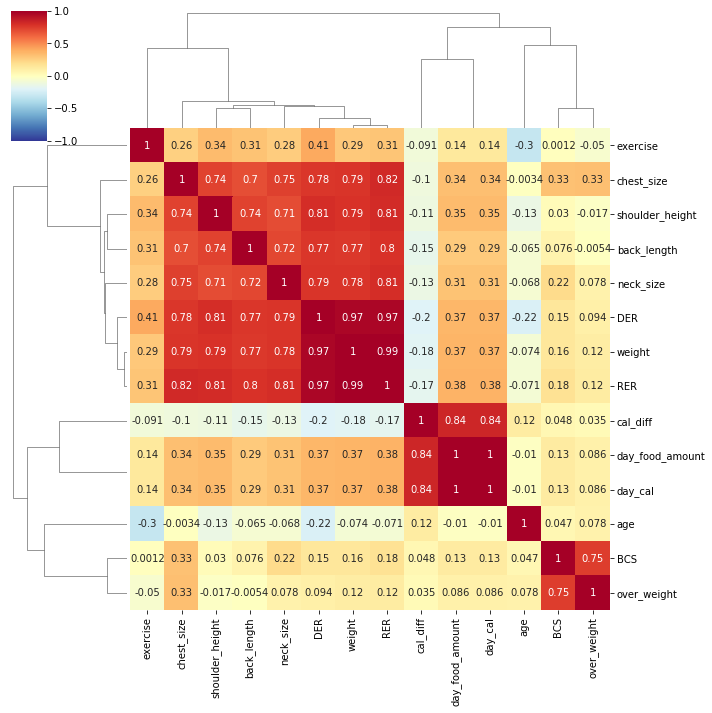

In [45]:
import seaborn as sns
corr_df = df.corr()
plt.figure(figsize = (40, 40))
sns.clustermap(corr_df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

In [46]:
df.columns

Index(['mission_id', 'breed', 'age', 'weight', 'shoulder_height', 'neck_size',
       'back_length', 'chest_size', 'sex', 'exercise', 'BCS',
       'day_food_amount', 'over_weight', 'RER', 'DER', 'day_cal', 'cal_diff'],
      dtype='object')

In [265]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
 #'MIX', 'JIN'
breed_name = ['MAL', 'ETC', 'POO', 'POM', 'DRI', 'CHI', 'GOL']

for name in breed_name:
    df_breed = df.loc[df['breed'] == name][['BCS', 'age', 'weight', 'shoulder_height',
                                            'neck_size', 'back_length', 'chest_size',
                                            'day_cal', 'cal_diff']]
    
    # 변수선택
    y = df_breed['BCS']
    x = df_breed.drop('BCS', axis = 1)

    variables = df_breed.columns[1:].tolist()

    selected_variables = []
    sl_enter = 0.05
    sl_remove = 0.15
 
    sv_per_step = []
    adjusted_r_squared = []
    steps = []
    step = 0

    while len(variables) > 0:
        
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index = remainder)
    
        for col in remainder: 
            x = df_breed[selected_variables + [col]]
            x = sm.add_constant(x)
            model = sm.OLS(y, x).fit()
            pval[col] = model.pvalues[col]
        
        min_pval = pval.min()
        if min_pval < sl_enter:
            selected_variables.append(pval.idxmin())
        
            while len(selected_variables) > 0:
            
                selected_X = df_breed[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y, selected_X).fit().pvalues[1:]
                max_pval = selected_pval.max()
            
                if max_pval >= sl_remove:
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
        
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(df_breed[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    
    print(f"{name}'s selected variables: ")
    print(selected_variables)
    print('\n')
    selected_var = ' + '.join(selected_variables)
    reg_breed = ols(f'BCS ~ {selected_var}', data = df_breed).fit()
    print(reg_breed.summary())
    print('\n')
    print('\n')

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/home/jh20/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


MAL's selected variables: 
['neck_size', 'weight']


                            OLS Regression Results                            
Dep. Variable:                    BCS   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     32.62
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.21e-12
Time:                        00:40:45   Log-Likelihood:                -243.01
No. Observations:                 166   AIC:                             492.0
Df Residuals:                     163   BIC:                             501.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    BCS   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     18.97
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           2.63e-06
Time:                        00:40:45   Log-Likelihood:                -38.607
No. Observations:                  38   AIC:                             83.21
Df Residuals:                      35   BIC:                             88.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9775      0.706      1.384      0.1

/home/jh20/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


- 그나마 시츄의 설명력이 괜찮다
- 시츄의 관측도 38개 정도로 적지 않은 편이라 시츄로 분류를 해볼까..

# 분류모델링
- 시츄에 대해서만

In [237]:
df_dri = df.loc[df['breed'] == 'DRI']

In [203]:
df_dri.corr()

,age,weight,shoulder_height,neck_size,back_length,chest_size,day_cal,cal_diff,fat
age,1.000000,0.137707,0.041069,-0.128261,0.122799,0.253908,-0.083132,0.004579,0.008248
weight,0.137707,1.000000,0.519612,0.741695,0.511026,0.819039,0.161143,-0.005646,0.625907
shoulder_height,0.041069,0.519612,1.000000,0.326815,0.205765,0.387836,0.234695,0.128103,0.234138
neck_size,-0.128261,0.741695,0.326815,1.000000,0.261765,0.723245,-0.067756,-0.227724,0.533795
back_length,0.122799,0.511026,0.205765,0.261765,1.000000,0.365989,0.054129,-0.010154,0.183291
chest_size,0.253908,0.819039,0.387836,0.723245,0.365989,1.000000,0.004721,-0.113235,0.659316
day_cal,-0.083132,0.161143,0.234695,-0.067756,0.054129,0.004721,1.000000,0.972256,0.158362
cal_diff,0.004579,-0.005646,0.128103,-0.227724,-0.010154,-0.113235,0.972256,1.000000,0.041075
fat,0.008248,0.625907,0.234138,0.533795,0.183291,0.659316,0.158362,0.041075,1.000000


In [238]:
df_dri.columns

Index(['mission_id', 'breed', 'age', 'weight', 'shoulder_height', 'neck_size',
       'back_length', 'chest_size', 'sex', 'exercise', 'BCS',
       'day_food_amount', 'over_weight', 'RER', 'DER', 'day_cal', 'cal_diff'],
      dtype='object')

In [239]:
df_dri['fat'] = 0
df_dri.loc[df_dri['BCS'] > 5, 'fat'] = 1
df_dri.fat.value_counts()

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jh20/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0    22
1    16
Name: fat, dtype: int64

In [240]:
df_dri = df_dri[['age', 'weight', 'shoulder_height', 'neck_size',
                 'back_length', 'chest_size', 'day_cal', 'cal_diff', 'fat']]

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [242]:
### train, test 데이터 분리
train, test = train_test_split(df_dri, test_size = 0.2,
                               random_state = 11, stratify = df_dri['fat'])

train_X = train[train.columns[:-1]]
train_y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_y = test[test.columns[-1:]]
X = df_dri[df_dri.columns[:-1]]
y = df_dri[df_dri.columns[-1:]]

In [243]:
from sklearn.model_selection import GridSearchCV, KFold

params = { 'n_estimators' : [10, 100],
           'max_depth' : [n for n in range(1, 21)],
           'min_samples_leaf' : [2, 4, 6, 8, 10],
           'min_samples_split' : [2, 4, 6, 8, 10]
            }

rf_clf = RandomForestClassifier(n_jobs = -1, random_state = 11)

gcv2 = GridSearchCV(rf_clf,
                    param_grid = params,
                    cv = 3,
                    n_jobs = -1)

gcv2.fit(train_X, train_y)

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=11),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 100]})

In [249]:
print('최적 하이퍼 파라미터: ', gcv2.best_params_)
print('최고 예측 Accuracy score: {:.4f}'.format(gcv2.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
최고 예측 Accuracy score: 0.8333


In [245]:
gcv2.predict_proba(train_X)

array([[0.39036808, 0.60963192],
       [0.35416898, 0.64583102],
       [0.81111886, 0.18888114],
       [0.75081849, 0.24918151],
       [0.70375967, 0.29624033],
       [0.39661221, 0.60338779],
       [0.59692565, 0.40307435],
       [0.39661221, 0.60338779],
       [0.78063872, 0.21936128],
       [0.68018357, 0.31981643],
       [0.79326172, 0.20673828],
       [0.59692565, 0.40307435],
       [0.46679198, 0.53320802],
       [0.35416898, 0.64583102],
       [0.54505285, 0.45494715],
       [0.5507718 , 0.4492282 ],
       [0.46724713, 0.53275287],
       [0.67381727, 0.32618273],
       [0.28353406, 0.71646594],
       [0.365887  , 0.634113  ],
       [0.68018357, 0.31981643],
       [0.7100038 , 0.2899962 ],
       [0.61977984, 0.38022016],
       [0.59718329, 0.40281671],
       [0.72876592, 0.27123408],
       [0.28353406, 0.71646594],
       [0.86389664, 0.13610336],
       [0.78063872, 0.21936128],
       [0.46679198, 0.53320802],
       [0.7100038 , 0.2899962 ]])

In [246]:
### RandomForest Classification Model

model_rf2 = gcv2.best_estimator_
prediction_rf2_f1 = model_rf2.predict(test_X)
print('Accuracy for Random Forests is',
      metrics.accuracy_score(prediction_rf2_f1, test_y)) # 분류 정확도

Accuracy for Random Forests is 0.875


/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

In [248]:
prediction_rf2_f1

array([1, 1, 0, 1, 0, 1, 0, 0])

In [247]:
### RandomForest Classification Model

model_rf2 = gcv2.best_estimator_
prediction_rf2_f1 = model_rf2.predict(test_X)
print('Accuracy for Random Forests is',
      metrics.accuracy_score(prediction_rf2_f1, test_y)) # 분류 정확도

Accuracy for Random Forests is 0.875


In [184]:
prediction_rf2_f1

array([1, 1, 0, 1, 0, 1, 0, 0])

In [188]:
dri_series = pd.Series(prediction_rf2_f1)
dri_series.index = test_y.index
result_dri = pd.concat([test_y.fat, dri_series], axis = 1)
result_dri.columns = ['True_y', 'Test_y']
result_dri

,True_y,Test_y
5549,1,1
9649,0,1
58,0,0
4678,1,1
8096,0,0
3772,1,1
7046,0,0
9943,0,0


In [136]:
test_y

,fat
5549,1
9649,0
58,0
4678,1
8096,0
3772,1
7046,0
9943,0


In [137]:
### RandomForest Classification Model

model_nothing = RandomForestClassifier()

model_nothing.fit(train_X.values, train_y.values)
prediction_nothing = model_nothing.predict(test_X.values)
print('F1 score for nothing is',
      metrics.f1_score(prediction_nothing, test_y.values, average = 'macro')) # 분류 정확도

F1 score for nothing is 0.7499999999999999


/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [90]:
prediction_nothing

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

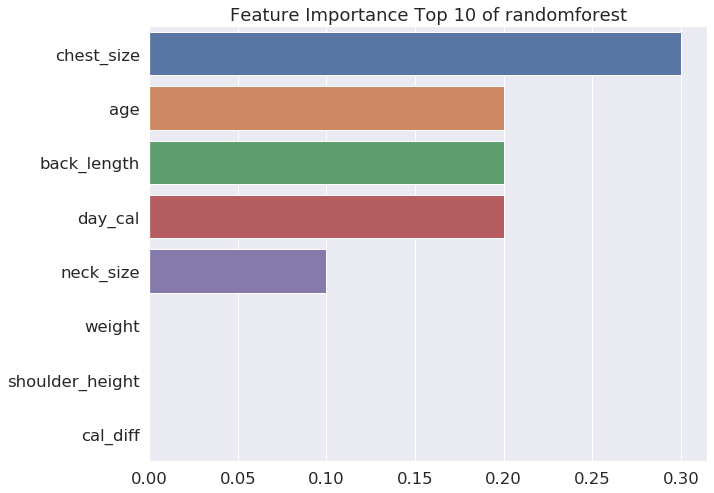

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt
# Feature Importance
ft_importance_value = model_rf2.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X.columns)
ft_top10 = ft_series.sort_values(ascending = False)

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (10, 8))
plt.title('Feature Importance Top 10 of randomforest')
sns.barplot(x = ft_top10, y = ft_top10.index)
plt.show()

### 랜덤포레스트 말고 다른 분류기

In [178]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

model_extree = ExtraTreesClassifier()
model_extree.fit(train_X.values, train_y.values)
pred_extree = model_extree.predict(test_X.values)
print('F1 score for Extremely Randomized Trees is ',
      metrics.f1_score(pred_extree, test_y, average = 'macro'))

F1 score for Extremely Randomized Trees is  0.7499999999999999


/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [179]:
pred_extree

array([1, 1, 0, 1, 1, 1, 0, 0])

In [180]:
test_y

,fat
5549,1
9649,0
58,0
4678,1
8096,0
3772,1
7046,0
9943,0


### xgboost

In [181]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(train_X, train_y)
pred_xg = model_xg.predict(test_X)
print('F1 score for xgboost is ',
      metrics.f1_score(pred_xg, test_y, average = 'macro'))

[19:39:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score for xgboost is  0.7499999999999999


/home/jh20/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa

In [182]:
pred_xg

array([1, 0, 1, 1, 1, 1, 0, 0])

# 말티즈로도 해보자

In [141]:
df_mal = df.loc[df['breed'] == 'MAL']
df_mal

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER,day_cal,cal_diff
140,10_000142,MAL,7.0,3.39,20.0,25.0,10.0,32.98,CM,1,5,2.00,0.000000,174.883088,349.766176,600.0,250.233824
222,10_000217,MAL,18.0,2.99,21.0,21.0,19.0,34.00,SF,1,5,1.00,0.000000,159.166414,190.999697,300.0,109.000303
458,10_000236,MAL,1.0,1.70,20.0,16.0,24.0,28.00,IF,2,5,0.76,0.000000,104.216079,208.432159,228.0,19.567841
476,10_000237,MAL,12.0,6.00,22.0,27.0,23.0,47.00,CM,1,7,1.60,1.000000,268.356104,322.027325,480.0,157.972675
556,10_000260,MAL,9.0,5.90,26.0,33.0,35.0,47.00,CM,1,6,6.20,0.536364,264.994615,317.993538,1860.0,1542.006462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916,10_100050,MAL,2.0,2.50,25.0,22.0,28.0,30.00,IF,2,5,1.01,0.000000,139.172378,278.344755,303.0,24.655245
12435,10_101464,MAL,9.0,3.10,22.0,22.0,23.0,33.00,SF,1,6,4.60,0.281818,163.538237,196.245884,1380.0,1183.754116
12453,10_101465,MAL,8.0,3.20,25.0,20.0,23.0,34.00,CM,1,6,4.60,0.290909,167.479063,200.974876,1380.0,1179.025124
12472,10_101466,MAL,9.8,3.69,27.0,28.0,35.0,39.00,CM,2,4,1.00,-0.410000,186.366485,298.186376,300.0,1.813624


In [142]:
df_mal.BCS.value_counts()

5    60
4    38
6    31
3    24
7     6
2     4
9     2
8     1
Name: BCS, dtype: int64

In [143]:
df_mal['fat'] = 0
df_mal.loc[df_mal['BCS'] > 5, 'fat'] = 1
df_mal.fat.value_counts()

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jh20/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0    126
1     40
Name: fat, dtype: int64

In [144]:
df_mal = df_mal[['age', 'weight', 'shoulder_height', 'neck_size',
                 'back_length', 'chest_size', 'day_cal', 'cal_diff', 'fat']]

In [145]:
### train, test 데이터 분리
train, test = train_test_split(df_mal, test_size = 0.2,
                               random_state = 11, stratify = df_mal['fat'])

train_X = train[train.columns[:-1]]
train_y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_y = test[test.columns[-1:]]
X = df_mal[df_mal.columns[:-1]]
y = df_mal[df_mal.columns[-1:]]

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

In [147]:
from sklearn.model_selection import GridSearchCV, KFold

params = { 'n_estimators' : [10, 100],
           'max_depth' : [n for n in range(1, 21)],
           'min_samples_leaf' : [2, 4, 6, 8, 10],
           'min_samples_split' : [2, 4, 6, 8, 10]
            }

rf_mal = RandomForestClassifier(n_jobs = -1, random_state = 11)

gcv_mal = GridSearchCV(rf_mal,
                       param_grid = params,
                       cv = 3,
                       scoring = 'f1',
                       n_jobs = -1)

gcv_mal.fit(train_X, train_y)

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=11),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 100]},
             scoring='f1')

In [148]:
print('최적 하이퍼 파라미터: ', gcv_mal.best_params_)
print('최고 예측 f1 score: {:.4f}'.format(gcv_mal.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
최고 예측 f1 score: 0.3694


In [150]:
### RandomForest Classification Model

mal_rf = gcv_mal.best_estimator_
pred_mal_rf = mal_rf.predict(test_X)
print('F1_Score for Random Forests is',
      metrics.f1_score(pred_mal_rf, test_y, average = 'macro')) # 분류 정확도

F1_Score for Random Forests is 0.49404761904761907


In [154]:
mal_series = pd.Series(pred_mal_rf)
mal_series.index = test_y.index
mal_series

7357     0
11765    0
7958     0
7907     0
6675     1
9055     0
2860     0
2580     0
12453    0
7558     0
2047     0
4410     0
795      0
5804     0
476      0
3579     0
7833     1
4214     0
7306     0
3674     0
222      0
6340     0
5397     0
660      0
6714     0
9022     0
7889     0
10530    1
7028     0
10519    0
3034     1
4448     0
4758     0
4428     0
dtype: int64

In [155]:
pd.concat([test_y, mal_series], axis = 1)

,fat,0
7357,0,0
11765,0,0
7958,0,0
7907,0,0
6675,0,1
9055,0,0
2860,1,0
2580,0,0
12453,1,0
7558,0,0


# 포메로 마지막

In [156]:
df_pom = df.loc[df['breed'] == 'POM']
df_pom

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER,day_cal,cal_diff
74,10_000131,POM,5.0,3.90,27.0,21.0,26.0,37.0,CM,3,6,1.200,0.354545,194.265865,388.531729,360.0,-28.531729
155,10_000143,POM,3.0,3.75,23.0,21.0,25.0,36.0,IF,1,7,2.398,0.625000,188.634659,377.269318,719.4,342.130682
513,10_000256,POM,3.0,2.88,24.0,24.0,20.0,40.0,IM,3,5,4.800,0.000000,154.754186,309.508372,1440.0,1130.491628
521,10_000257,POM,3.0,2.88,24.0,24.0,20.0,40.0,IM,3,5,4.800,0.000000,154.754186,309.508372,1440.0,1130.491628
533,10_000258,POM,2.0,2.24,19.0,22.0,20.0,35.0,CM,2,5,6.000,0.000000,128.169312,256.338624,1800.0,1543.661376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12346,10_100946,POM,3.0,2.00,22.0,18.0,19.0,29.0,IF,2,5,2.200,0.000000,117.725498,235.450996,660.0,424.549004
12362,10_100950,POM,6.0,2.10,21.0,17.0,20.0,27.0,IF,2,6,2.200,0.190909,122.113172,244.226343,660.0,415.773657
12380,10_100957,POM,9.0,3.60,22.0,23.0,26.0,32.0,IF,2,7,2.200,0.600000,182.946841,329.304314,660.0,330.695686
12399,10_100958,POM,1.0,3.50,19.0,20.0,22.0,36.0,IF,2,7,2.200,0.583333,179.122059,358.244118,660.0,301.755882


In [157]:
df_pom.BCS.value_counts()

5    46
6    32
4    23
7     8
3     2
9     1
8     1
Name: BCS, dtype: int64

In [158]:
df_pom['fat'] = 0
df_pom.loc[df_pom['BCS'] > 5, 'fat'] = 1
df_pom.fat.value_counts()

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jh20/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0    71
1    42
Name: fat, dtype: int64

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

In [159]:
df_pom = df_pom[['age', 'weight', 'shoulder_height', 'neck_size',
                 'back_length', 'chest_size', 'day_cal', 'cal_diff', 'fat']]

In [160]:
### train, test 데이터 분리
train, test = train_test_split(df_pom, test_size = 0.2,
                               random_state = 11, stratify = df_pom['fat'])

train_X = train[train.columns[:-1]]
train_y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_y = test[test.columns[-1:]]
X = df_pom[df_pom.columns[:-1]]
y = df_pom[df_pom.columns[-1:]]

In [162]:
from sklearn.model_selection import GridSearchCV, KFold

params = { 'n_estimators' : [10, 100],
           'max_depth' : [n for n in range(1, 21)],
           'min_samples_leaf' : [2, 4, 6, 8, 10],
           'min_samples_split' : [2, 4, 6, 8, 10]
            }

rf_pom = RandomForestClassifier(n_jobs = -1, random_state = 11)

gcv_pom = GridSearchCV(rf_pom,
                       param_grid = params,
                       cv = 3,
                       scoring = 'f1',
                       n_jobs = -1)

gcv_pom.fit(train_X, train_y)

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=11),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 100]},
             scoring='f1')

In [163]:
print('최적 하이퍼 파라미터: ', gcv_pom.best_params_)
print('최고 예측 f1 score: {:.4f}'.format(gcv_pom.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 f1 score: 0.5809


In [164]:
### RandomForest Classification Model

pom_rf = gcv_pom.best_estimator_
pred_pom_rf = gcv_pom.predict(test_X)
print('F1_Score for Random Forests is',
      metrics.f1_score(pred_pom_rf, test_y, average = 'macro')) # 분류 정확도

F1_Score for Random Forests is 0.4102564102564103


In [165]:
pom_series = pd.Series(pred_pom_rf)
pom_series.index = test_y.index
pd.concat([test_y, pom_series], axis = 1)

,fat,0
6695,0,1
11295,0,1
10387,1,0
3480,0,1
2216,0,0
6636,0,0
591,0,0
11471,1,0
3540,1,0
155,1,0
